# Linear Regression Project

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.Using Linear Regression model to figure it out!

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv("Ecommerce Customers")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
sns.set_palette("nipy_spectral")
sns.set_style('darkgrid')

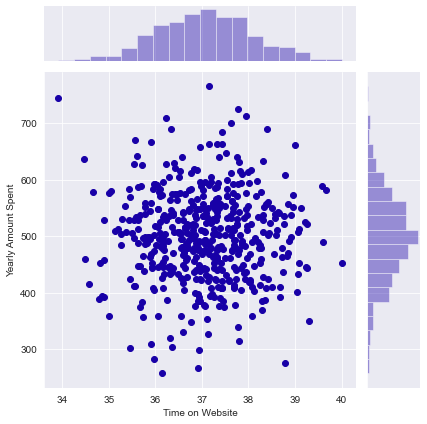

In [17]:
# Time on website vs Yearly amount spent:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

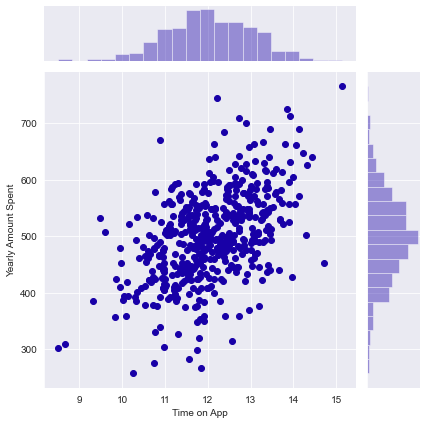

In [18]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

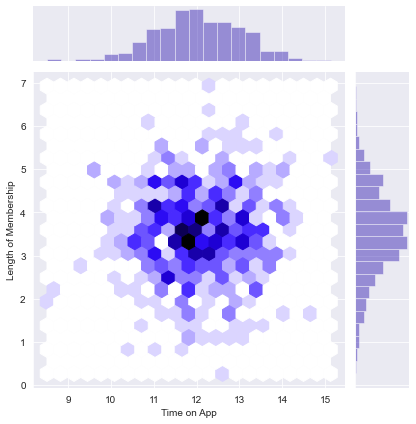

In [20]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df)

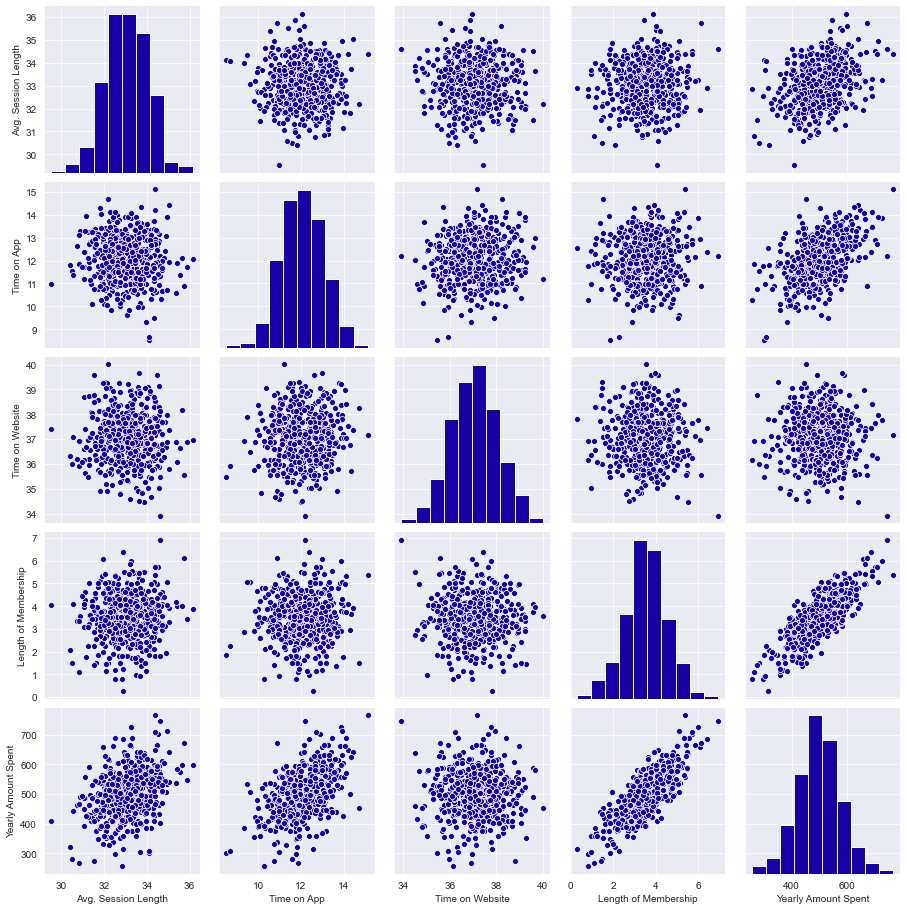

In [22]:
sns.pairplot(df)

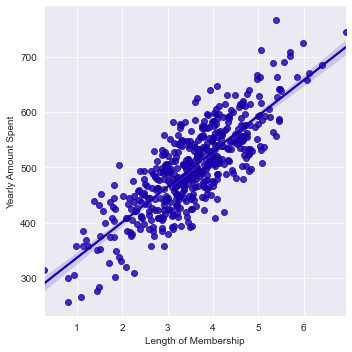

In [28]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

# Splitting Train & Test Data

Assiging all the neumeric variables as Feature & 'Yearly Amount Spent' as Label

In [29]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [30]:
y = df['Yearly Amount Spent']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
# coefficient values
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


# Prediction of the test data

In [38]:
predictions = lm.predict( X_test)

Create a scatterplot of test results vs predicted results

Text(0, 0.5, 'Predicted Y')

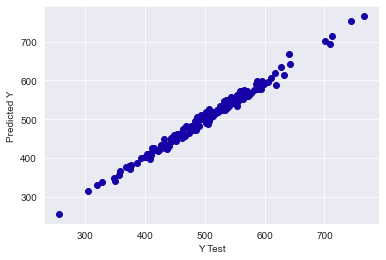

In [40]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluate the Model

Evaluate the model using Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430839
MSE: 79.81305165097469
RMSE: 8.933815066978648


# Calculating Coeffcients to relate between Labels & Features

In [48]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


From the above coeffecient we can observe that 'Length of Membership' has more impact on the depedant variable 'Yearly Amount Spent'

Now we can reate co-efficients of these independant variables to establish the relationship between dependant & independant variables.